<a href="https://colab.research.google.com/github/varuntyagiai/skills-introduction-to-github/blob/main/Multiple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df_index = pd.read_csv("/content/economic_index.csv")


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


drop unnaccessary columns

In [ ]:
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

KeyError: "['Unnamed: 0', 'year', 'month'] not found in axis"

In [7]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [8]:
df_index.isnull().sum()

,0
Unnamed: 0,0
year,0
month,0
interest_rate,0
unemployment_rate,0
index_price,0


lets do some viusualisation

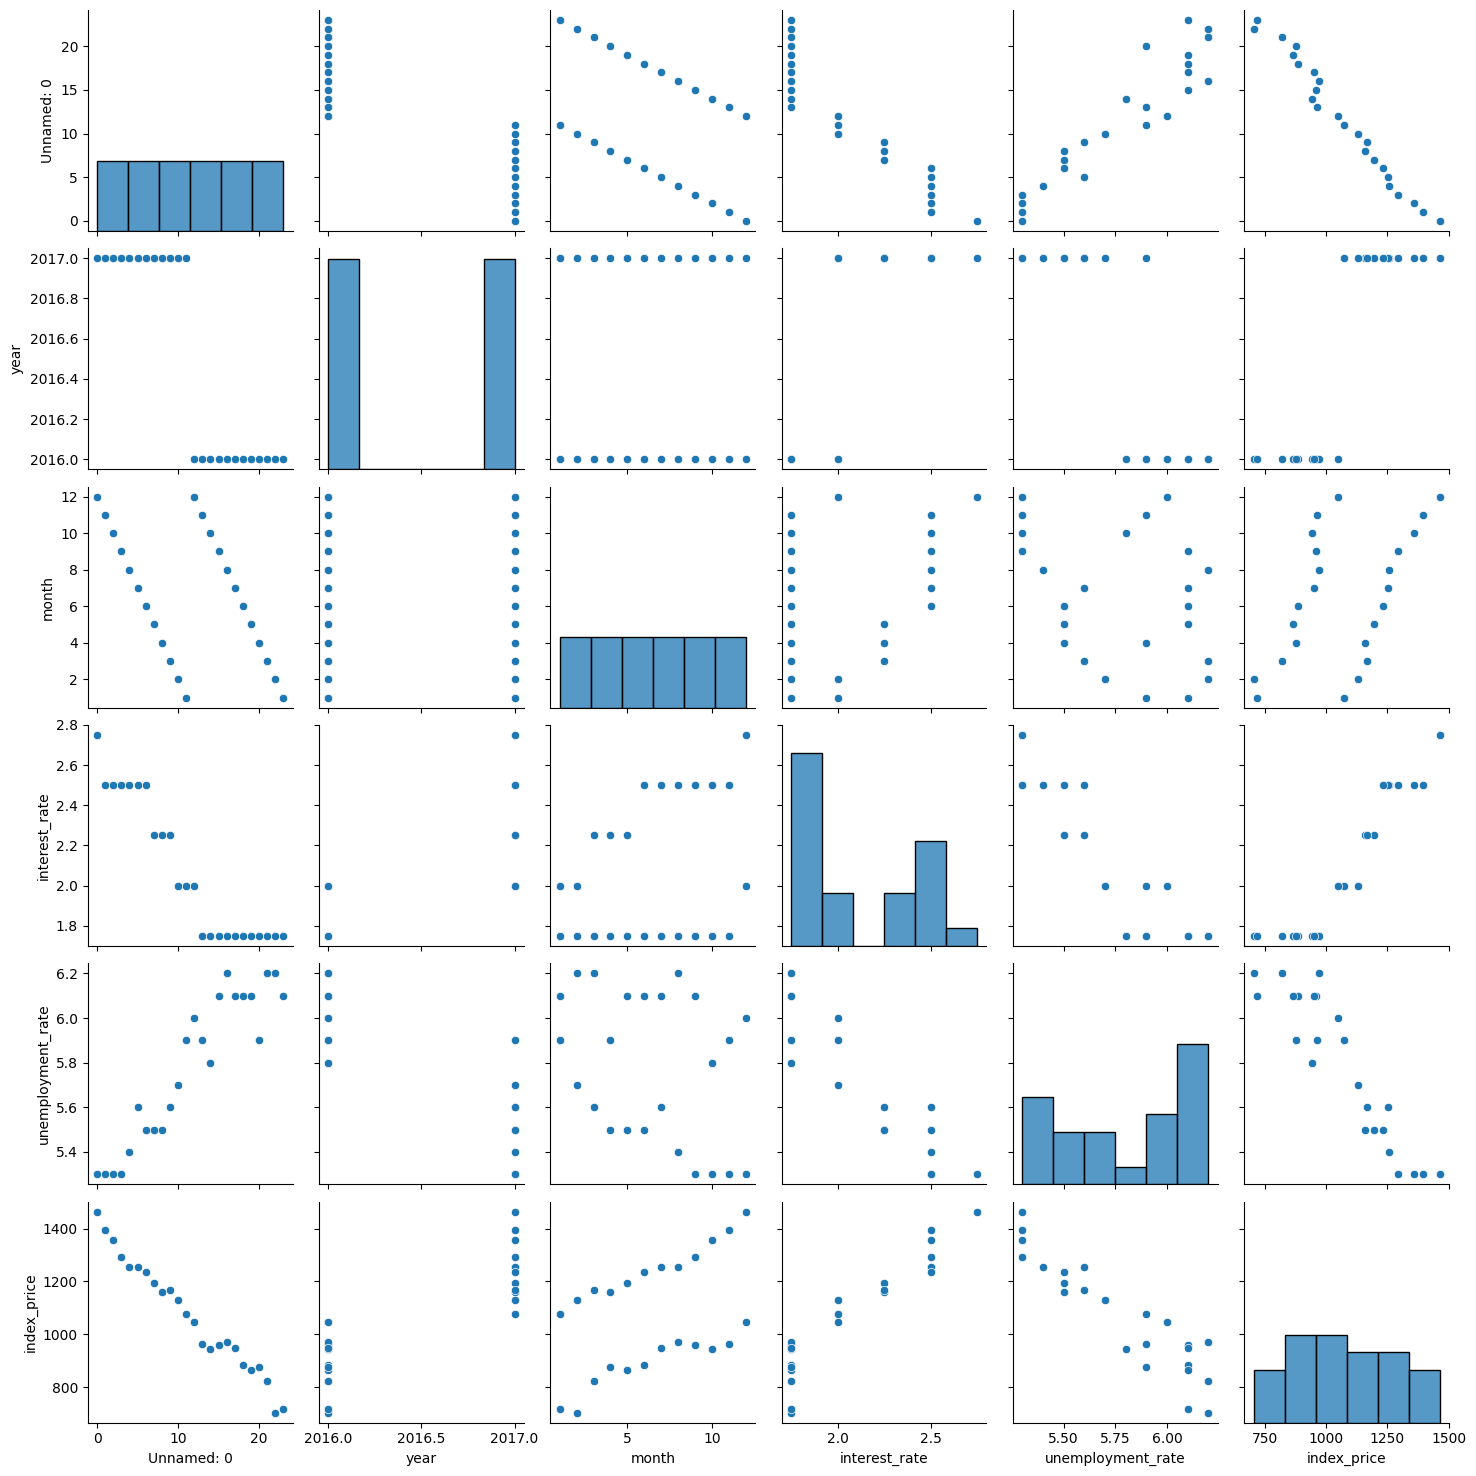

In [9]:
import seaborn as sns
sns.pairplot(df_index)

In [10]:
df_index.corr()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
Unnamed: 0,1.000000,-8.667781e-01,-4.986939e-01,-0.934555,0.935300,-0.988246
year,-0.866778,1.000000e+00,7.884865e-14,0.882851,-0.877000,0.863232
month,-0.498694,7.884865e-14,1.000000e+00,0.339526,-0.351189,0.481287
interest_rate,-0.934555,8.828507e-01,3.395257e-01,1.000000,-0.925814,0.935793
unemployment_rate,0.935300,-8.769997e-01,-3.511891e-01,-0.925814,1.000000,-0.922338
index_price,-0.988246,8.632321e-01,4.812873e-01,0.935793,-0.922338,1.000000


Visualize datapoint more closely

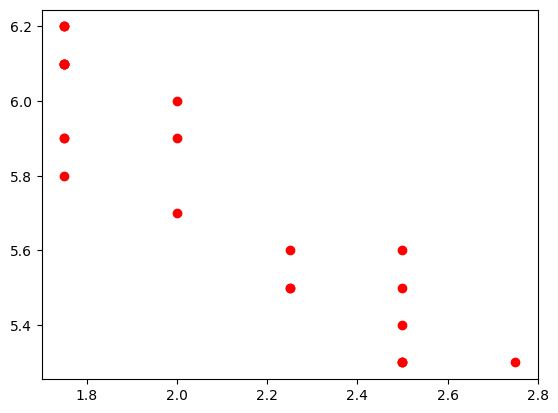

In [11]:
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color ="r")

In [12]:
x= df_index.iloc[:,:-1]
y= df_index.iloc[:,-1]

In [13]:
x.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate
0,0,2017,12,2.75,5.3
1,1,2017,11,2.50,5.3
2,2,2017,10,2.50,5.3
3,3,2017,9,2.50,5.3
4,4,2017,8,2.50,5.4


In [14]:
y

,index_price
0,1464
1,1394
2,1357
3,1293
4,1256
5,1254
6,1234
7,1195
8,1159
9,1167


explain test and train split

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [16]:
import seaborn as sns


<Axes: xlabel='interest_rate', ylabel='index_price'>

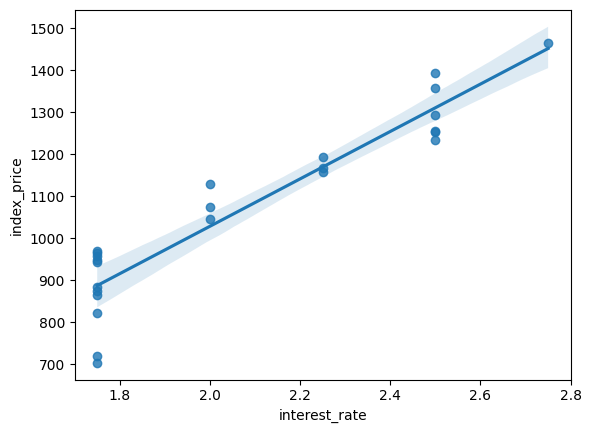

In [17]:
sns.regplot(x='interest_rate', y='index_price', data=df_index)

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

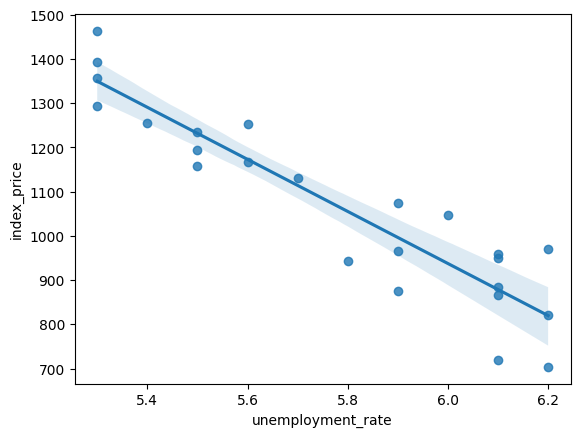

In [18]:
sns.regplot(x='unemployment_rate', y='index_price', data=df_index)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

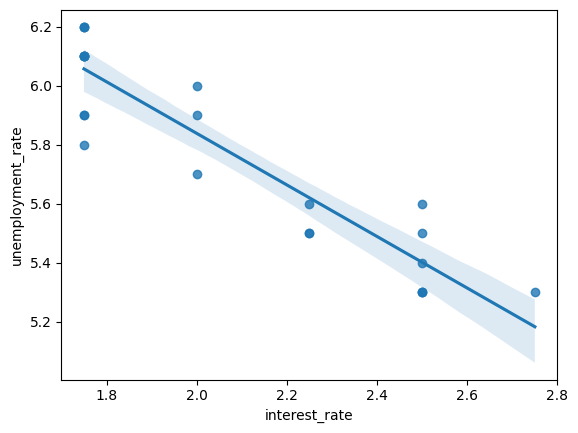

In [19]:
sns.regplot(x='interest_rate', y='unemployment_rate', data=df_index)

In [20]:
from sklearn.preprocessing import StandardScaler


In [21]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [22]:
x_train

array([[ 0.15426662, -0.89442719,  1.25692828, -0.90115511,  0.37908503],
       [-1.51181292,  1.11803399,  1.25692828,  1.31077107, -1.48187786],
       [ 1.26498632, -0.89442719, -1.12462004, -0.90115511,  1.30956648],
       [-0.95645307,  1.11803399,  0.06615412,  1.31077107, -0.55139641],
       [-1.37297296,  1.11803399,  0.95923474,  1.31077107, -1.48187786],
       [ 0.01542666, -0.89442719,  1.55462182, -0.16384638,  0.68924552],
       [ 0.43194655, -0.89442719,  0.6615412 , -0.90115511,  0.999406  ],
       [-1.23413299,  1.11803399,  0.6615412 ,  1.31077107, -1.48187786],
       [-1.09529303,  1.11803399,  0.36384766,  1.31077107, -1.17171738],
       [ 1.40382628, -0.89442719, -1.42231358, -0.90115511,  1.30956648],
       [ 0.70962647, -0.89442719,  0.06615412, -0.90115511,  0.999406  ],
       [ 1.12614636, -0.89442719, -0.8269265 , -0.90115511,  0.37908503],
       [ 1.54266624, -0.89442719, -1.72000712, -0.90115511,  0.999406  ],
       [-0.67877315,  1.11803399, -0.5

In [23]:
x_test

array([[-0.39886202,  0.70710678, -0.46423835,  0.36115756, -0.82078268],
       [ 0.9686649 , -1.41421356,  0.64993368, -1.08347268,  1.33377186],
       [-1.76638894,  0.70710678,  1.76410571,  1.8057878 , -1.43636969],
       [ 1.31054663, -1.41421356,  0.09284767, -1.08347268,  1.02597835],
       [ 0.11396058,  0.70710678, -1.29986737, -0.36115756,  0.41039134],
       [-0.22792115,  0.70710678, -0.74278135,  0.36115756, -0.51298918]])

In [24]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()


In [25]:
regression.fit(x_train,y_train)

LinearRegression()

Cross val score>> this is used to evaluate by cross validation

In [26]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,x_train,y_train,scoring='neg_mean_squared_error',cv=3)


In [27]:
validation_score

array([-1118.96622222, -2442.06672278, -1108.20691688])

In [28]:
np.mean(validation_score)

np.float64(-1556.4132872905557)

prediction

In [29]:
y_pred = regression.predict(x_test)

In [30]:
y_pred

array([1137.77287695,  852.80136784, 1374.71877553,  792.98757646,
       1052.52761415, 1109.85845574])

Performance Matrics

In [31]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)


In [32]:
print(mse)
print(mae)
print(rmse)

5741.0116476034445
66.55555555559026
75.76946382021879


Assumptions

In [33]:
from sklearn.metrics import r2_score


In [34]:
score = r2_score(y_test,y_pred)
print(score )

0.8294647707506353


display adjusted R Square

In [47]:
1-(1-score)*len(y_test)/(len(y_test)-x_test.shape[1]-1)
print(1-(1-score)*len(y_test)/(len(y_test)-x_test.shape[1]-1))

ZeroDivisionError: float division by zero

**need to verify this seems ambiguity **

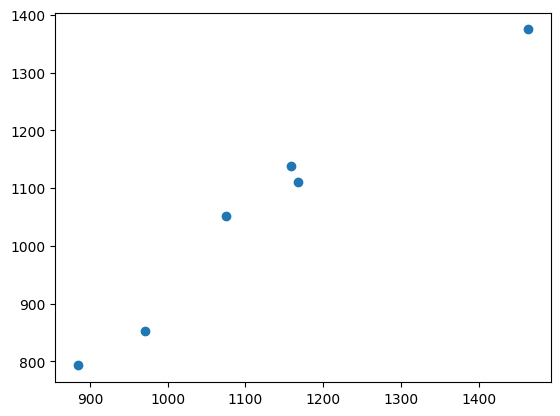

In [36]:
plt.scatter(y_test,y_pred)


In [37]:
residuals= y_test-y_pred
print(residuals)

8      21.227123
16    118.198632
0      89.281224
18     91.012424
11     22.472386
9      57.141544
Name: index_price, dtype: float64


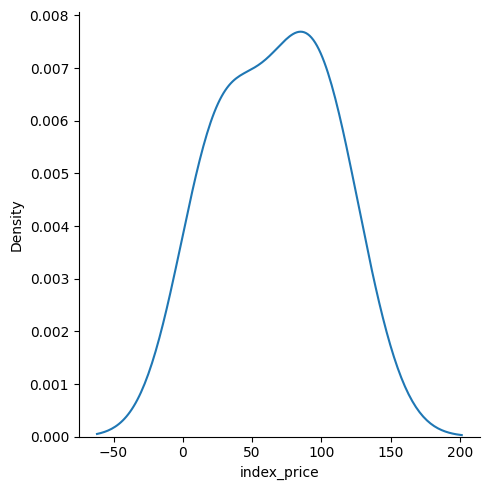

In [38]:
sns.displot(residuals, kind='kde')

Scatter plot with respect to predictions and residuals

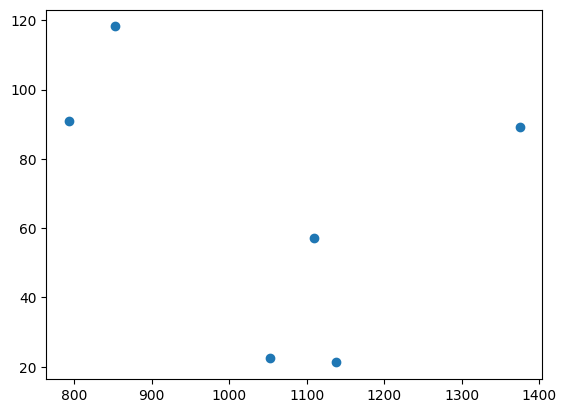

In [39]:
plt.scatter(y_pred,residuals)

**OLS(ordinary least square ) linear Regression**

In [40]:
import statsmodels.api as sm
model = sm.OLS(y_train,x_train).fit()

In [41]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            index_price   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     149.2
Date:                Sun, 18 Jan 2026   Prob (F-statistic):           1.01e-10
Time:                        06:53:00   Log-Likelihood:                -87.222
No. Observations:                  18   AIC:                             184.4
Df Residuals:                      13   BIC:                             188.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          6.265e+15   5.08e+13    123.420      0.000    6.16e+15    6.37e+15
x2          5.187e+15    4.2e+13    123.420      0.000     5.1e+15    5.28e+15
x3          2.922e+15   2.37e+13    123.420      0.000    2.87e+15    2.97e+15
x4             3.4387     28.076      0.122      0.904     -57.216      64.094
x5             2.3966     28.996      0.083      0.935     -60.246      65.039
==============================================================================
Omnibus:                        0.033   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.983   Jarque-Bera (JB):                0.240
Skew:                          -0.058   Prob(JB):                        0.887
Kurtosis:                       2.446   Cond. No.                     1.63e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.67e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [42]:
print(regression.coef_)

[-99.315132    95.15576872  44.03529318   3.91839437   4.31560867]
